# 12a. AutoML for Regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

# Predictors/Input:
X = pd.DataFrame(data.data,columns=data.feature_names)

# Predictand/output:
y = pd.DataFrame(data.target,columns=data.target_names)

In [2]:
d_data = X.join(y)

In [3]:
# 90% data for training/testing and 10% for validation

data_traintest = d_data.sample(frac=0.9, random_state=123)
data_unseen = d_data.drop(data_traintest.index)

data_traintest.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data_traintest.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (18576, 9)
Unseen Data For Predictions: (2064, 9)


In [4]:
from sklearn.model_selection import train_test_split


In [5]:
d_train, d_test = train_test_split(data_traintest, random_state =123 , test_size = 0.3)

In [6]:
from pycaret.regression import *


In [7]:
setup_df = setup(data= d_train, target = 'MedHouseVal',html=False, silent=True, verbose=False)

## Comparing all models:

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using k-fold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) along with training time.

In [8]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.536,1.2116,0.9189,0.0905,0.224,0.3162,1.837


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088
llar,Lasso Least Angle Regression,0.9102,1.3309,1.1534,-0.0005,0.3623,0.6215,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088
llar,Lasso Least Angle Regression,0.9102,1.3309,1.1534,-0.0005,0.3623,0.6215,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088
br,Bayesian Ridge,0.5361,1.2130,0.9192,0.0894,0.2240,0.3162,0.015
llar,Lasso Least Angle Regression,0.9102,1.3309,1.1534,-0.0005,0.3623,0.6215,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088
br,Bayesian Ridge,0.5361,1.2130,0.9192,0.0894,0.2240,0.3162,0.015
llar,Lasso Least Angle Regression,0.9102,1.3309,1.1534,-0.0005,0.3623,0.6215,0.017
par,Passive Aggressive Regressor,1.0010,2.6492,1.4104,-0.9519,0.3672,0.5844,0.026


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088
br,Bayesian Ridge,0.5361,1.2130,0.9192,0.0894,0.2240,0.3162,0.015
llar,Lasso Least Angle Regression,0.9102,1.3309,1.1534,-0.0005,0.3623,0.6215,0.017
par,Passive Aggressive Regressor,1.0010,2.6492,1.4104,-0.9519,0.3672,0.5844,0.026
huber,Huber Regressor,0.5819,3.4038,1.2494,-1.5544,0.2400,0.3241,0.040


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088
knn,K Neighbors Regressor,0.8510,1.2103,1.0997,0.0899,0.3450,0.5488,0.031
br,Bayesian Ridge,0.5361,1.2130,0.9192,0.0894,0.2240,0.3162,0.015
llar,Lasso Least Angle Regression,0.9102,1.3309,1.1534,-0.0005,0.3623,0.6215,0.017
par,Passive Aggressive Regressor,1.0010,2.6492,1.4104,-0.9519,0.3672,0.5844,0.026


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.4920,0.5684,0.7523,0.5728,0.2241,0.2718,0.033
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088
knn,K Neighbors Regressor,0.8510,1.2103,1.0997,0.0899,0.3450,0.5488,0.031
br,Bayesian Ridge,0.5361,1.2130,0.9192,0.0894,0.2240,0.3162,0.015
llar,Lasso Least Angle Regression,0.9102,1.3309,1.1534,-0.0005,0.3623,0.6215,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3507,0.2796,0.5273,0.7901,0.1581,0.1985,0.323
dt,Decision Tree Regressor,0.4920,0.5684,0.7523,0.5728,0.2241,0.2718,0.033
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088
knn,K Neighbors Regressor,0.8510,1.2103,1.0997,0.0899,0.3450,0.5488,0.031
br,Bayesian Ridge,0.5361,1.2130,0.9192,0.0894,0.2240,0.3162,0.015


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3475,0.2708,0.5189,0.7968,0.1537,0.1927,0.187
rf,Random Forest Regressor,0.3507,0.2796,0.5273,0.7901,0.1581,0.1985,0.323
dt,Decision Tree Regressor,0.4920,0.5684,0.7523,0.5728,0.2241,0.2718,0.033
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088
knn,K Neighbors Regressor,0.8510,1.2103,1.0997,0.0899,0.3450,0.5488,0.031


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3475,0.2708,0.5189,0.7968,0.1537,0.1927,0.187
rf,Random Forest Regressor,0.3507,0.2796,0.5273,0.7901,0.1581,0.1985,0.323
dt,Decision Tree Regressor,0.4920,0.5684,0.7523,0.5728,0.2241,0.2718,0.033
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
ada,AdaBoost Regressor,0.7258,0.7286,0.8529,0.4514,0.2873,0.5290,0.100
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018
ridge,Ridge Regression,0.5360,1.2119,0.9190,0.0903,0.2240,0.3162,1.088


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3475,0.2708,0.5189,0.7968,0.1537,0.1927,0.187
rf,Random Forest Regressor,0.3507,0.2796,0.5273,0.7901,0.1581,0.1985,0.323
gbr,Gradient Boosting Regressor,0.3723,0.2881,0.5353,0.7838,0.1634,0.2117,0.214
dt,Decision Tree Regressor,0.4920,0.5684,0.7523,0.5728,0.2241,0.2718,0.033
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
ada,AdaBoost Regressor,0.7258,0.7286,0.8529,0.4514,0.2873,0.5290,0.100
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lr,Linear Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,1.837
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.3261,0.2388,0.4876,0.8207,0.1484,0.1831,18.721
et,Extra Trees Regressor,0.3475,0.2708,0.5189,0.7968,0.1537,0.1927,0.187
rf,Random Forest Regressor,0.3507,0.2796,0.5273,0.7901,0.1581,0.1985,0.323
gbr,Gradient Boosting Regressor,0.3723,0.2881,0.5353,0.7838,0.1634,0.2117,0.214
dt,Decision Tree Regressor,0.4920,0.5684,0.7523,0.5728,0.2241,0.2718,0.033
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
ada,AdaBoost Regressor,0.7258,0.7286,0.8529,0.4514,0.2873,0.5290,0.100
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077
lar,Least Angle Regression,0.5360,1.2116,0.9189,0.0905,0.2240,0.3162,0.018


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3187,0.2272,0.4752,0.8296,0.1445,0.1798,0.216
xgboost,Extreme Gradient Boosting,0.3261,0.2388,0.4876,0.8207,0.1484,0.1831,18.721
et,Extra Trees Regressor,0.3475,0.2708,0.5189,0.7968,0.1537,0.1927,0.187
rf,Random Forest Regressor,0.3507,0.2796,0.5273,0.7901,0.1581,0.1985,0.323
gbr,Gradient Boosting Regressor,0.3723,0.2881,0.5353,0.7838,0.1634,0.2117,0.214
dt,Decision Tree Regressor,0.4920,0.5684,0.7523,0.5728,0.2241,0.2718,0.033
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
ada,AdaBoost Regressor,0.7258,0.7286,0.8529,0.4514,0.2873,0.5290,0.100
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3187,0.2272,0.4752,0.8296,0.1445,0.1798,0.216
xgboost,Extreme Gradient Boosting,0.3261,0.2388,0.4876,0.8207,0.1484,0.1831,18.721
et,Extra Trees Regressor,0.3475,0.2708,0.5189,0.7968,0.1537,0.1927,0.187
rf,Random Forest Regressor,0.3507,0.2796,0.5273,0.7901,0.1581,0.1985,0.323
gbr,Gradient Boosting Regressor,0.3723,0.2881,0.5353,0.7838,0.1634,0.2117,0.214
dt,Decision Tree Regressor,0.4920,0.5684,0.7523,0.5728,0.2241,0.2718,0.033
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
ada,AdaBoost Regressor,0.7258,0.7286,0.8529,0.4514,0.2873,0.5290,0.100
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3187,0.2272,0.4752,0.8296,0.1445,0.1798,0.216
xgboost,Extreme Gradient Boosting,0.3261,0.2388,0.4876,0.8207,0.1484,0.1831,18.721
et,Extra Trees Regressor,0.3475,0.2708,0.5189,0.7968,0.1537,0.1927,0.187
rf,Random Forest Regressor,0.3507,0.2796,0.5273,0.7901,0.1581,0.1985,0.323
gbr,Gradient Boosting Regressor,0.3723,0.2881,0.5353,0.7838,0.1634,0.2117,0.214
dt,Decision Tree Regressor,0.4920,0.5684,0.7523,0.5728,0.2241,0.2718,0.033
omp,Orthogonal Matching Pursuit,0.6232,0.6902,0.8301,0.4813,0.2590,0.3841,0.016
ada,AdaBoost Regressor,0.7258,0.7286,0.8529,0.4514,0.2873,0.5290,0.100
en,Elastic Net,0.6733,0.7559,0.8689,0.4319,0.2762,0.4498,0.700
lasso,Lasso Regression,0.7595,0.9352,0.9667,0.2972,0.3059,0.5154,1.077


The 3 out of 5 best models in term of R2 ranking are lightgbm, xgboost and rf

Two simple lines of code have trained and evaluated over 20 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using R2 (highest to lowest) which can be changed by passing sort parameter. For example compare_models(sort = 'RMSE') will sort the grid by RMSE (lower to higher since lower is better).

If you want to change the fold parameter from the default value of **10** to a different value then you can use the fold parameter. For example compare_models(fold = 5) will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, compare_models return the best performing model based on default sort order but can be used to return a list of top N models by using n_select parameter.

## Create a Model
create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

- Ada ('ada')
- Light Gradient Boosting Machine ('lightgbm')
- Decision Tree ('dt')

There are 25 regressors available in the model library of PyCaret. To see list of all regressors either check the docstring or use models function to see the library.

In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### Create model Adaptive Boosting

In [10]:
ada = create_model('ada')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7324,0.7721,0.8787,0.4477,0.2867,0.5109
1,0.7355,0.7494,0.8657,0.4358,0.2902,0.5305
2,0.7574,0.7648,0.8745,0.4430,0.2969,0.5626
3,0.7573,0.7475,0.8646,0.3997,0.2974,0.5708
4,0.7087,0.7255,0.8518,0.4786,0.2887,0.5303
5,0.6977,0.6758,0.8221,0.4930,0.2764,0.5004
6,0.7172,0.7016,0.8376,0.4285,0.2847,0.5195
7,0.6689,0.6413,0.8008,0.5257,0.2662,0.4750
8,0.6819,0.6650,0.8155,0.5022,0.2805,0.5156
9,0.8006,0.8433,0.9183,0.3599,0.3058,0.5744


### Create model Light Gradient Boosting Machine


In [11]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3061,0.1942,0.4406,0.8447,0.1362,0.1709
1,0.3101,0.1976,0.4445,0.8468,0.1374,0.1747
2,0.3126,0.2212,0.4703,0.8244,0.1441,0.1795
3,0.3567,0.3089,0.5558,0.7678,0.1680,0.2022
4,0.3156,0.2188,0.4678,0.8375,0.1401,0.1686
5,0.3283,0.2434,0.4934,0.8215,0.1460,0.1751
6,0.3333,0.2507,0.5007,0.8298,0.1489,0.1829
7,0.3086,0.1900,0.4359,0.8471,0.1350,0.1781
8,0.3204,0.2331,0.4829,0.8302,0.1439,0.1773
9,0.3193,0.2262,0.4756,0.8271,0.1423,0.1845


### Create Decision Tree


In [17]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4963,0.5633,0.7506,0.5495,0.2206,0.2611
1,0.4730,0.5122,0.7157,0.6028,0.2112,0.2545
2,0.4642,0.5527,0.7434,0.5612,0.2223,0.2528
3,0.5345,0.7324,0.8558,0.4493,0.2543,0.2979
4,0.4649,0.4957,0.7040,0.6319,0.2079,0.2377
5,0.5023,0.6066,0.7789,0.5551,0.2283,0.2623
6,0.5076,0.6198,0.7873,0.5791,0.2324,0.2818
7,0.4878,0.5944,0.7710,0.5215,0.2278,0.2681
8,0.4897,0.6045,0.7775,0.5597,0.2246,0.2655
9,0.4689,0.4928,0.7020,0.6234,0.2116,0.2605


Notice that the Mean score of all models matches with the score printed in compare_models(). This is because the metrics printed in the compare_models() score grid are the average scores across all CV folds. Similar to compare_models(), if you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For Example: create_model('rf', fold = 5) to create Random Forest using 5 fold cross validation.

## Tune a model

When a model is created using the create_model function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model function is used. This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. To use the custom search grid, you can pass custom_grid parameter in the tune_model function (see 9.2 LightGBM tuning below).

### Adaboost

In [18]:
tuned_ada = tune_model(ada)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.9s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5801,0.5278,0.7265,0.5779,0.2470,0.4148
1,0.5948,0.5303,0.7282,0.5888,0.2490,0.4299
2,0.6013,0.5678,0.7535,0.5492,0.2540,0.4335
3,0.6225,0.6139,0.7835,0.5385,0.2601,0.4402
4,0.5942,0.5479,0.7402,0.5931,0.2473,0.4142
5,0.6111,0.5860,0.7655,0.5703,0.2533,0.4236
6,0.6208,0.5949,0.7713,0.5960,0.2559,0.4403
7,0.6073,0.5634,0.7506,0.5464,0.2559,0.4445
8,0.5989,0.5862,0.7657,0.5730,0.2537,0.4291
9,0.5969,0.5314,0.7290,0.5939,0.2491,0.4393


In [19]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.15, loss='linear',
                  n_estimators=60, random_state=604)


###  Light Gradient Boosting Machine

In [23]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [24]:
tuned_lightgbm = tune_model(lightgbm)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3079,0.2003,0.4476,0.8398,0.1401,0.1730
1,0.3162,0.2049,0.4527,0.8411,0.1442,0.1819
2,0.3154,0.2209,0.4700,0.8246,0.1454,0.1819
3,0.3501,0.2943,0.5425,0.7787,0.1640,0.1926
4,0.3143,0.2237,0.4730,0.8339,0.1409,0.1667
5,0.3136,0.2219,0.4711,0.8372,0.1401,0.1702
6,0.3241,0.2341,0.4839,0.8410,0.1449,0.1773
7,0.2982,0.1773,0.4211,0.8572,0.1342,0.1755
8,0.3131,0.2210,0.4701,0.8390,0.1414,0.1756
9,0.3151,0.2190,0.4679,0.8327,0.1432,0.1850


In [25]:
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=26, min_child_weight=0.001, min_split_gain=0,
              n_estimators=260, n_jobs=-1, num_leaves=30, objective=None,
              random_state=604, reg_alpha=1e-07, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Decision Tree

In [21]:
tuned_dt = tune_model(dt)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4283,0.3754,0.6127,0.6998,0.1853,0.2399
1,0.4410,0.3972,0.6302,0.6920,0.1901,0.2465
2,0.4162,0.4098,0.6401,0.6747,0.1923,0.2362
3,0.4710,0.5285,0.7270,0.6026,0.2215,0.2769
4,0.4317,0.4028,0.6347,0.7009,0.1907,0.2338
5,0.4730,0.4899,0.6999,0.6407,0.2086,0.2602
6,0.4473,0.4360,0.6603,0.7039,0.1948,0.2491
7,0.4224,0.3897,0.6242,0.6863,0.1907,0.2468
8,0.4349,0.4224,0.6499,0.6924,0.1923,0.2439
9,0.4155,0.3682,0.6068,0.7186,0.1859,0.2427


By default, tune_model optimizes R2 but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'MAE') will search for the hyperparameters of a Decision Tree Regressor that results in the lowest MAE instead of highest R2. For the purposes of this example, we have used the default metric R2 for the sake of simplicity only. The methodology behind selecting the right metric to evaluate a regressor is beyond the scope of this tutorial but if you would like to learn more about it, you can click here to develop an understanding on regression error metrics.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of k-folds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned Light Gradient Boosting Machine stored in the tuned_lightgbm variable as our best model for the remainder of this tutorial.

## Plot model

Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are over 10 plots available, please see the plot_model() docstring for the list of available plots.

### Residual plot

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


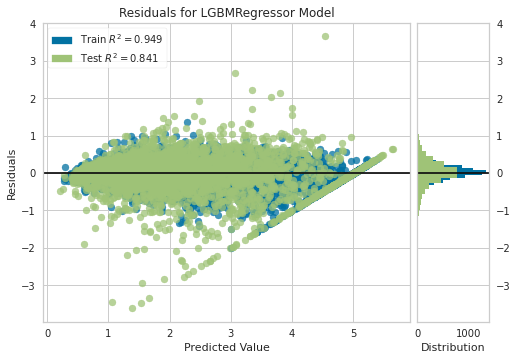

In [26]:
plot_model(tuned_lightgbm)

### Predicted Error plot

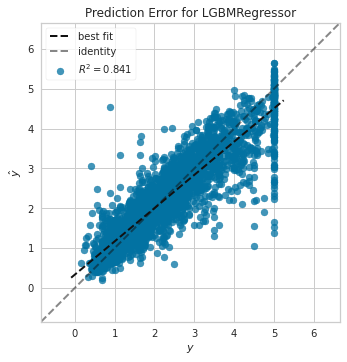

In [27]:
plot_model(tuned_lightgbm, plot = 'error')

### Feature Importance Plot

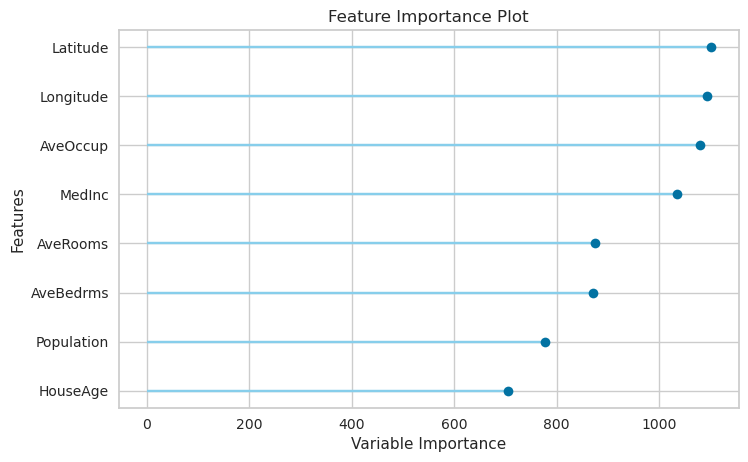

In [28]:
plot_model(tuned_lightgbm, plot='feature')

## Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (1621 samples) of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross-validated results based on training set (70%) only. Now, using our final trained model stored in the tuned_lightgbm variable we will predict the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.m

In [29]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3091,0.2237,0.473,0.8414,0.1434,0.1739


The R2 on the test/hold-out set is 0.9652 compared to 0.9708 achieved on tuned_lightgbm CV results (in section 9.2 above). This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 10% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using create_model.)

## Predict on Unseen data

In [30]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [31]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Label
0,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.84,-122.26,1.913,1.862729
1,2.7750,52.0,5.939577,1.048338,793.0,2.395770,37.85,-122.27,1.525,2.017753
2,1.7250,52.0,5.096234,1.131799,1015.0,2.123431,37.84,-122.27,1.139,1.482906
3,1.4103,52.0,3.749380,0.967742,901.0,2.235732,37.83,-122.28,1.039,1.444759
4,1.2852,51.0,3.759036,1.248996,517.0,2.076305,37.83,-122.26,1.500,1.633542
